In [1]:
### python 3.5 version
### virtualEnv_name is helloTF

import tensorflow as tf
tf.__version__

'1.6.0'

# 설치 및 테스트

In [2]:
# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, TensorFlow!")

# seart a TF session
sess = tf.Session()

# run the op and get result
print(sess.run(hello))

b'Hello, TensorFlow!'


In [3]:
## 더하기 예제
# Build graph (tensor) using TensorFlow operations
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

In [4]:
print("node1: {} node2: {}".format(node1,node2))
print("node3: {}".format(node3))

node1: Tensor("Const_1:0", shape=(), dtype=float32) node2: Tensor("Const_2:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


In [5]:
# feed data and run graph (operation) sess.run(op)
sess = tf.Session() 
print("sess.run(node1, node2): ".format(sess.run([node1, node2])))
print("sess.run(node3): ", sess.run(node3))

sess.run(node1, node2): 
sess.run(node3):  7.0


In [6]:
# placeholder(상수가 아닌 변수를 만들어줌)
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provides a shortcut for tf.add(a,b)

print(sess.run(adder_node, feed_dict={a: 3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))

7.5
[3. 7.]


# Lab2

In [7]:
### Lab2
### Linear Regression

## 1. Build graph using TF operations
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# tf.Variable의 의미는 tesnsorflow가 사용하는 변수라는 의미 or trainable variable
w = tf.Variable(tf.random_normal([1]), name='weight') # 1차원 array에 대한 랜덤값을 넣어줌
b = tf.Variable(tf.random_normal([1]), name='bias')
# Our hypothesis Xw+b
hypothesis = x_train * w + b

In [8]:
# cost/loss funtion
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) # 평균을 내줌

In [9]:
# Minimize(GradientDescent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [10]:
## 2. Run/update graph and get results
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph - 사용하기 전에 변수 초기화가 필요함.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 1.0728709 [0.7537372] [-0.5235653]
20 0.025340294 [1.1078311] [-0.34828427]
40 0.014409578 [1.1353782] [-0.31756896]
60 0.0130090015 [1.1321214] [-0.30127832]
80 0.011814274 [1.1262078] [-0.28698924]
100 0.010729914 [1.1203047] [-0.27348942]
120 0.009745072 [1.1146536] [-0.26063526]
140 0.00885064 [1.1092656] [-0.24838632]
160 0.008038292 [1.1041306] [-0.23671311]
180 0.0073005133 [1.0992367] [-0.22558841]
200 0.0066304333 [1.0945729] [-0.21498662]
220 0.006021874 [1.0901284] [-0.2048831]
240 0.0054691727 [1.0858928] [-0.19525439]
260 0.0049671903 [1.0818559] [-0.18607816]
280 0.004511265 [1.078009] [-0.177333]
300 0.0040972014 [1.0743428] [-0.16899891]
320 0.0037211385 [1.070849] [-0.16105652]
340 0.0033795957 [1.0675194] [-0.15348738]
360 0.003069401 [1.0643462] [-0.14627407]
380 0.0027876757 [1.0613221] [-0.13939972]
400 0.0025318058 [1.0584401] [-0.13284826]
420 0.002299427 [1.0556936] [-0.12660481]
440 0.0020883763 [1.0530763] [-0.12065484]
460 0.0018967008 [1.0505819] [-0.11498

In [11]:
# Now we can use x and y in place of x_data and y_data
# # placeholders for a tensor that will be always fed using feed_dict
# See http://stackoverflow.com/questions/336693740/
w = tf.Variable(tf.random_normal([1]), name='weight') # 1차원 array에 대한 랜덤값을 넣어줌
b = tf.Variable(tf.random_normal([1]), name='bias')
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis xw+b
hypothesis = x * w + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y)) # 평균을 내줌

# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# launch the graph in a session
sess = tf.Session()
# initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# fit the line with new training data
for step in range(2001):
    cost_val, w_val, b_val, _ = sess.run([cost, w , b, train],
                                        feed_dict={x: [1,2,3,4,5], y:[2.1,3.1,4.1,5.1,6.1]}) # _ 변수는 필요없다는 의미
    if step % 20 == 0:
        print(step, cost_val, w_val, b_val)
        
# Testing our model
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[5]}))
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[2.5]}))
print("테스트 결과는 ",sess.run(hypothesis, feed_dict={x:[1.5, 3.5]}))

0 1.1341431 [0.5874212] [1.7399166]
20 0.07854171 [0.8177041] [1.7543083]
40 0.068572484 [0.8305609] [1.7117114]
60 0.05988481 [0.8416618] [1.6716509]
80 0.052297838 [0.8520316] [1.6342129]
100 0.045672115 [0.8617222] [1.5992268]
120 0.039885752 [0.8707781] [1.5665321]
140 0.03483253 [0.87924093] [1.5359784]
160 0.030419514 [0.8871496] [1.5074259]
180 0.026565623 [0.8945402] [1.4807433]
200 0.023199912 [0.90144676] [1.4558082]
220 0.020260671 [0.90790117] [1.4325062]
240 0.0176938 [0.91393274] [1.41073]
260 0.015452144 [0.9195694] [1.3903799]
280 0.013494437 [0.9248369] [1.3713627]
300 0.011784824 [0.9297593] [1.353591]
320 0.010291776 [0.93435943] [1.3369832]
340 0.008987883 [0.93865824] [1.3214631]
360 0.007849191 [0.94267565] [1.306959]
380 0.006854729 [0.94642985] [1.293405]
400 0.0059862807 [0.9499383] [1.2807387]
420 0.005227872 [0.95321685] [1.268902]
440 0.0045655374 [0.9562807] [1.2578404]
460 0.003987115 [0.9591438] [1.2475034]
480 0.0034819916 [0.9618195] [1.2378435]
500 0.0

# Lab3

In [13]:
### lab3
## 경사하강법이 잘 적용되는지 확인
import matplotlib.pyplot as plt

x=[1,2,3]
y=[1,2,3]

w = tf.placeholder(tf.float32)
# Our hypothesis f or linear model X*W
hypothesis = x*w

In [14]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-y))

In [15]:
# Launch the graph in a session.
sess = tf.Session()
# Initializess global variables in the graph.
sess.run(tf.global_variables_initializer())

In [16]:
# Variables for plotting cost function
w_val = []
cost_val = []
for i in range(-30, 50):
    feed_w = i * 0.1
    curr_cost, curr_w = sess.run([cost, w], feed_dict={w: feed_w})
    w_val.append(curr_w)
    cost_val.append(curr_cost)

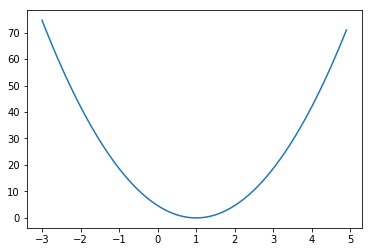

In [17]:
# Show the cost function
plt.plot(w_val, cost_val)
plt.show()

In [18]:
## 최소화 모델
x_data = [1,2,3]
y_data = [1,2,3]

w = tf.Variable(tf.random_normal([1]), name='weight')
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [19]:
# Our hypothesis for linear model X*W
hypothesis = x*w
# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - y))

In [20]:
# Minimize : Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((w*x - y) * x)
descent = w - learning_rate * gradient
update = w.assign(descent)
## 위의 4단계는 optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)// train=optimizer.minimize(cost) 과 같은 코드이다.

In [21]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={x:x_data, y:y_data})
    print(step, sess.run(cost, feed_dict={x:x_data, y:y_data}), sess.run(w))

0 0.5079385 [0.80952346]
1 0.14448017 [0.8984125]
2 0.041096583 [0.94582003]
3 0.011689704 [0.971104]
4 0.0033250758 [0.9845888]
5 0.0009457998 [0.9917807]
6 0.00026902775 [0.9956164]
7 7.652301e-05 [0.99766207]
8 2.1765125e-05 [0.99875313]
9 6.1915557e-06 [0.999335]
10 1.7605955e-06 [0.99964535]
11 5.0093894e-07 [0.9998108]
12 1.4259756e-07 [0.9998991]
13 4.053756e-08 [0.9999462]
14 1.1575892e-08 [0.9999713]
15 3.2906264e-09 [0.9999847]
16 9.364562e-10 [0.99999183]
17 2.666134e-10 [0.99999565]
18 7.48237e-11 [0.9999977]
19 2.2385649e-11 [0.99999875]
20 5.7873706e-12 [0.99999934]


In [23]:
## test
x = [1,2,3]
y = [1,2,3]
# set wrong model weights
w = tf.Variable(5.0)
# Linear model
hypothesis = x*w
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y))

In [24]:
# Minimize : Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

In [25]:
# Launch the graph in a session
sess = tf.Session()
#Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [28]:
for step in range(100):
    print(step, sess.run(w))
    sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


In [33]:
### Optional: compute_gradient and apply_gradient
x = [1,2,3]
y = [1,2,3]
# set wrong model weights
w = tf.Variable(5.)
# Linear model
hypothesis = x*w
# Manual gradient
gradient = tf.reduce_mean((w*x-y)*x)*2
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost,[w])
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, w, gvs]))
    sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.84889, 4.6266665, [(33.84889, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228264, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.738752, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.361395, [(12.706352, 2.361395)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445186, 2.119127)]]
14 [9.470302, 2.0146751, [(9.470302, 2.0146751)]]
15 [8.586407, 1.9199722, [(8.586407, 1.9199722)]]
16 [7.785009, 1.8341081, [(7.785009, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.399624, 1.685674, [(6.399624, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023257, 1.6216778)]]
20 

# Lab4

In [34]:
x1_data = [74., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

In [35]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y))
# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [36]:
# Launch the graph in a session.
# 매트릭스 사용 전
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n",hy_val)

0 Cost:  19044.596 
Prediction:
 [27.482075 38.287132 34.97956  40.149773 28.539104]
10 Cost:  1.8144153 
Prediction:
 [150.00716 184.91603 179.4532  197.47615 140.38272]
20 Cost:  1.6428789 
Prediction:
 [150.37445 185.35464 179.88582 197.9465  140.7177 ]
30 Cost:  1.6419414 
Prediction:
 [150.37611 185.35568 179.8873  197.94739 140.71892]
40 Cost:  1.6409895 
Prediction:
 [150.37671 185.35544 179.88751 197.94687 140.71915]
50 Cost:  1.6400483 
Prediction:
 [150.37726 185.35516 179.8877  197.94632 140.71936]
60 Cost:  1.6390989 
Prediction:
 [150.37782 185.35487 179.8879  197.94579 140.71959]
70 Cost:  1.638133 
Prediction:
 [150.3784  185.35461 179.88808 197.94524 140.71982]
80 Cost:  1.6372068 
Prediction:
 [150.37897 185.35434 179.88826 197.94472 140.72003]
90 Cost:  1.6362499 
Prediction:
 [150.37953 185.35408 179.88847 197.94417 140.72026]
100 Cost:  1.6353067 
Prediction:
 [150.38011 185.3538  179.88866 197.94365 140.72049]
110 Cost:  1.6343514 
Prediction:
 [150.38068 185.35355

1210 Cost:  1.5341396 
Prediction:
 [150.43993 185.32642 179.90901 197.88487 140.74728]
1220 Cost:  1.5332531 
Prediction:
 [150.44044 185.32617 179.90918 197.88434 140.74753]
1230 Cost:  1.5323782 
Prediction:
 [150.44095 185.32594 179.90935 197.8838  140.74777]
1240 Cost:  1.5315077 
Prediction:
 [150.44145 185.32571 179.90952 197.88329 140.74803]
1250 Cost:  1.5306352 
Prediction:
 [150.44197 185.32549 179.90968 197.88277 140.74828]
1260 Cost:  1.5297381 
Prediction:
 [150.44249 185.32527 179.90987 197.88223 140.74855]
1270 Cost:  1.5288749 
Prediction:
 [150.44301 185.32506 179.91006 197.88174 140.74883]
1280 Cost:  1.5279961 
Prediction:
 [150.4435  185.3248  179.91022 197.8812  140.74907]
1290 Cost:  1.5271134 
Prediction:
 [150.444   185.32458 179.91039 197.88065 140.74931]
1300 Cost:  1.5262454 
Prediction:
 [150.44452 185.32436 179.91058 197.88014 140.74957]
1310 Cost:  1.5253785 
Prediction:
 [150.44504 185.32413 179.91075 197.87964 140.74983]
1320 Cost:  1.5245024 
Predictio

In [37]:
# 매트릭스 사용(리스트 사용)
x_data = [[73., 80., 75.], [93., 88., 93.], [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

In [38]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  59005.414 
Prediction:
 [[-65.60401 ]
 [-73.15039 ]
 [-74.797874]
 [-83.77639 ]
 [-52.51764 ]]
10 Cost:  4.138098 
Prediction:
 [[149.27806]
 [185.11006]
 [179.67667]
 [193.33972]
 [144.46735]]
20 Cost:  3.5830803 
Prediction:
 [[149.93439]
 [185.88719]
 [180.44844]
 [194.17989]
 [145.05739]]
30 Cost:  3.5682747 
Prediction:
 [[149.94254]
 [185.88528]
 [180.45262]
 [194.18419]
 [145.05327]]
40 Cost:  3.5535393 
Prediction:
 [[149.94868]
 [185.88104]
 [180.45445]
 [194.18594]
 [145.04733]]
50 Cost:  3.5388985 
Prediction:
 [[149.95482]
 [185.87679]
 [180.45627]
 [194.18765]
 [145.04141]]
60 Cost:  3.5243287 
Prediction:
 [[149.96092]
 [185.87256]
 [180.45808]
 [194.18939]
 [145.0355 ]]
70 Cost:  3.5098286 
Prediction:
 [[149.96706]
 [185.86835]
 [180.45992]
 [194.19112]
 [145.02963]]
80 Cost:  3.4954078 
Prediction:
 [[149.97311]
 [185.86414]
 [180.46173]
 [194.19284]
 [145.02374]]
90 Cost:  3.4810524 
Prediction:
 [[149.97919]
 [185.85991]
 [180.46353]
 [194.19455]
 [145.01788

890 Cost:  2.5475879 
Prediction:
 [[150.41368]
 [185.5588 ]
 [180.59247]
 [194.32019]
 [144.59547]]
900 Cost:  2.5382042 
Prediction:
 [[150.4185 ]
 [185.55542]
 [180.59387]
 [194.32161]
 [144.5907 ]]
910 Cost:  2.5288923 
Prediction:
 [[150.42334]
 [185.5521 ]
 [180.59532]
 [194.32307]
 [144.58598]]
920 Cost:  2.5196278 
Prediction:
 [[150.42816]
 [185.54877]
 [180.59674]
 [194.32451]
 [144.58127]]
930 Cost:  2.5104165 
Prediction:
 [[150.43295]
 [185.54541]
 [180.59814]
 [194.32591]
 [144.57655]]
940 Cost:  2.5012746 
Prediction:
 [[150.43771]
 [185.54208]
 [180.59956]
 [194.32732]
 [144.57185]]
950 Cost:  2.492148 
Prediction:
 [[150.4425 ]
 [185.5388 ]
 [180.60098]
 [194.32877]
 [144.56718]]
960 Cost:  2.4830556 
Prediction:
 [[150.44727]
 [185.53548]
 [180.60239]
 [194.33018]
 [144.5625 ]]
970 Cost:  2.4740598 
Prediction:
 [[150.45201]
 [185.53221]
 [180.6038 ]
 [194.3316 ]
 [144.55786]]
980 Cost:  2.4650803 
Prediction:
 [[150.45673]
 [185.5289 ]
 [180.60518]
 [194.33301]
 [144

1800 Cost:  1.8675854 
Prediction:
 [[150.80278]
 [185.2884 ]
 [180.707  ]
 [194.43912]
 [144.21025]]
1810 Cost:  1.8617656 
Prediction:
 [[150.80652]
 [185.28581]
 [180.7081 ]
 [194.4403 ]
 [144.20651]]
1820 Cost:  1.8559749 
Prediction:
 [[150.81026]
 [185.28322]
 [180.70921]
 [194.44148]
 [144.20277]]
1830 Cost:  1.8501936 
Prediction:
 [[150.81396]
 [185.28061]
 [180.7103 ]
 [194.44267]
 [144.19904]]
1840 Cost:  1.8444618 
Prediction:
 [[150.81769]
 [185.278  ]
 [180.71138]
 [194.44382]
 [144.19531]]
1850 Cost:  1.8387325 
Prediction:
 [[150.8214 ]
 [185.27544]
 [180.71246]
 [194.44502]
 [144.1916 ]]
1860 Cost:  1.8330435 
Prediction:
 [[150.82509]
 [185.27286]
 [180.71353]
 [194.44617]
 [144.18788]]
1870 Cost:  1.8273869 
Prediction:
 [[150.82877]
 [185.27031]
 [180.71463]
 [194.44736]
 [144.18419]]
1880 Cost:  1.8217567 
Prediction:
 [[150.83244]
 [185.26775]
 [180.7157 ]
 [194.44853]
 [144.18051]]
1890 Cost:  1.8161656 
Prediction:
 [[150.8361 ]
 [185.26521]
 [180.71678]
 [194.4

In [44]:
## 파일 불러와서 작업하기 연습
import numpy as np
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1] # 0:-1은 마지막 열을 제외하고 모두 가져온다는 뜻
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

# placeholders for a tensor that wil be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

(6, 3) [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]] 6
(6, 1) [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]]


In [45]:
# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [46]:
# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
# Set up feed_dict variables inside the loop.
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  10694.952 
Prediction:
 [[249.98483]
 [300.06314]
 [295.8475 ]
 [321.24417]
 [229.74129]
 [168.25978]]
10 Cost:  1.922884 
Prediction:
 [[153.57721]
 [184.15776]
 [181.66022]
 [196.89124]
 [141.33183]
 [103.08405]]
20 Cost:  1.4312884 
Prediction:
 [[152.9227 ]
 [183.37367]
 [180.88632]
 [196.04828]
 [140.73456]
 [102.64383]]
30 Cost:  1.4301171 
Prediction:
 [[152.91666 ]
 [183.36925 ]
 [180.88052 ]
 [196.0418  ]
 [140.732   ]
 [102.642006]]
40 Cost:  1.4290017 
Prediction:
 [[152.91507 ]
 [183.3701  ]
 [180.87996 ]
 [196.04102 ]
 [140.73347 ]
 [102.643166]]
50 Cost:  1.4278651 
Prediction:
 [[152.91347]
 [183.37097]
 [180.8794 ]
 [196.04024]
 [140.73497]
 [102.64432]]
60 Cost:  1.4267454 
Prediction:
 [[152.9119  ]
 [183.37186 ]
 [180.87885 ]
 [196.03949 ]
 [140.73647 ]
 [102.645485]]
70 Cost:  1.4256392 
Prediction:
 [[152.91034]
 [183.37273]
 [180.8783 ]
 [196.03873]
 [140.73795]
 [102.64664]]
80 Cost:  1.4245262 
Prediction:
 [[152.90875]
 [183.3736 ]
 [180.87775]
 [196.0

880 Cost:  1.3498673 
Prediction:
 [[152.7993 ]
 [183.43558]
 [180.8405 ]
 [195.98207]
 [140.84712]
 [102.7254 ]]
890 Cost:  1.3490772 
Prediction:
 [[152.79811]
 [183.43626]
 [180.84012]
 [195.98141]
 [140.84834]
 [102.7262 ]]
900 Cost:  1.3482971 
Prediction:
 [[152.7969 ]
 [183.43694]
 [180.8397 ]
 [195.98076]
 [140.84956]
 [102.72701]]
910 Cost:  1.3475116 
Prediction:
 [[152.79572]
 [183.43762]
 [180.83932]
 [195.9801 ]
 [140.85077]
 [102.7278 ]]
920 Cost:  1.346734 
Prediction:
 [[152.79456]
 [183.43831]
 [180.83894]
 [195.97948]
 [140.85199]
 [102.72859]]
930 Cost:  1.3459597 
Prediction:
 [[152.79338]
 [183.439  ]
 [180.83855]
 [195.97884]
 [140.8532 ]
 [102.72939]]
940 Cost:  1.3451945 
Prediction:
 [[152.79222]
 [183.43967]
 [180.83817]
 [195.97821]
 [140.8544 ]
 [102.73018]]
950 Cost:  1.34444 
Prediction:
 [[152.79105]
 [183.4403 ]
 [180.83777]
 [195.97754]
 [140.85559]
 [102.73096]]
960 Cost:  1.343656 
Prediction:
 [[152.78989]
 [183.44101]
 [180.83739]
 [195.97693]
 [140

1730 Cost:  1.2923414 
Prediction:
 [[152.71146]
 [183.48721]
 [180.81218]
 [195.93123]
 [140.94167]
 [102.78183]]
1740 Cost:  1.2917596 
Prediction:
 [[152.71056 ]
 [183.48775 ]
 [180.8119  ]
 [195.93066 ]
 [140.94267 ]
 [102.782364]]
1750 Cost:  1.2911702 
Prediction:
 [[152.70966]
 [183.4883 ]
 [180.81163]
 [195.93013]
 [140.94368]
 [102.7829 ]]
1760 Cost:  1.2906097 
Prediction:
 [[152.70877 ]
 [183.4888  ]
 [180.81136 ]
 [195.92958 ]
 [140.94467 ]
 [102.783424]]
1770 Cost:  1.2900182 
Prediction:
 [[152.70792]
 [183.48935]
 [180.81108]
 [195.92903]
 [140.94571]
 [102.78395]]
1780 Cost:  1.2894616 
Prediction:
 [[152.70702]
 [183.48985]
 [180.8108 ]
 [195.92847]
 [140.94669]
 [102.78448]]
1790 Cost:  1.2888732 
Prediction:
 [[152.70616]
 [183.4904 ]
 [180.81053]
 [195.92793]
 [140.9477 ]
 [102.78499]]
1800 Cost:  1.288308 
Prediction:
 [[152.70528]
 [183.49092]
 [180.81027]
 [195.92738]
 [140.94868]
 [102.78551]]
1810 Cost:  1.2877345 
Prediction:
 [[152.7044  ]
 [183.49146 ]
 [180

In [47]:
# Ask mys score
print("Your score will be ", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))
print("Other score will be ", sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

Your score will be  [[180.23785]]
Other score will be  [[146.48792]
 [184.39519]]


# Lab5

In [48]:
## logistic regression
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

# placeholders for a tensor that will be always fed
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W) + b))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [49]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [51]:
## Train the model
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)
    
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 1.1371957
200 0.4361517
400 0.41948888
600 0.40454873
800 0.39079013
1000 0.3779339
1200 0.36582455
1400 0.3543682
1600 0.3435022
1800 0.33318064
2000 0.3233669
2200 0.31402972
2400 0.30514106
2600 0.2966751
2800 0.2886078
3000 0.28091672
3200 0.27358064
3400 0.26657936
3600 0.25989395
3800 0.25350657
4000 0.24740036
4200 0.2415595
4400 0.23596913
4600 0.2306153
4800 0.22548473
5000 0.22056524
5200 0.21584535
5400 0.21131402
5600 0.20696117
5800 0.20277745
6000 0.1987537
6200 0.19488163
6400 0.19115335
6600 0.18756163
6800 0.18409945
7000 0.18076037
7200 0.17753816
7400 0.1744272
7600 0.17142208
7800 0.16851771
8000 0.16570933
8200 0.16299255
8400 0.16036296
8600 0.15781668
8800 0.15534991
9000 0.1529591
9200 0.15064093
9400 0.14839219
9600 0.14620993
9800 0.14409135
10000 0.14203362

Hypothesis:  [[0.02766467]
 [0.15445626]
 [0.28979725]
 [0.78835386]
 [0.94388396]
 [0.9816248 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0
